In [74]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [75]:
df = pd.read_csv('datasets/Total_consumption_for_all_sectors_monthly.csv', parse_dates=['Month'], date_format='%Y-%m')
df.dropna(inplace=True)
df.head()
df.set_index("Month", inplace=True)

<Axes: xlabel='Month'>

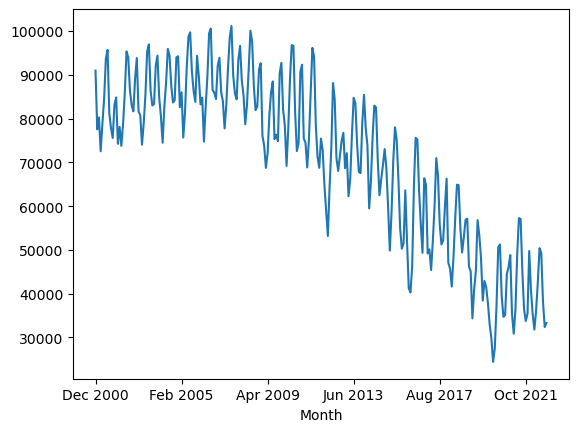

In [76]:
series = pd.Series(df['United States : coal thousand tons'])
series = series[::-1]
series.plot()

In [77]:
sm.stats.acorr_ljungbox(series, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,219.393953,1.226249e-49
2,382.585302,8.368685e-84
3,513.944803,4.534662e-111
4,655.803633,1.291566e-140
5,832.297927,1.190153e-177
6,1022.523668,1.201607e-217
7,1191.424061,5.051152e-253
8,1319.557558,1.392314e-279
9,1432.793589,6.343703e-303
10,1569.029097,0.000000e+00


In [78]:
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.16228462608030755
p-value: 0.9700651278703118


In [79]:
series_diff = series.diff().dropna()

<Axes: xlabel='Month'>

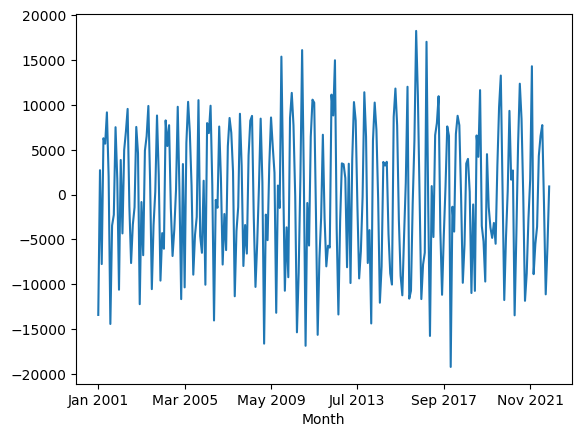

In [80]:
series_diff.plot()

In [81]:
sm.stats.acorr_ljungbox(series_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,13.401791,2.513842e-04
2,31.653251,1.338394e-07
3,133.892769,7.835764e-29
4,166.308728,6.480302e-35
5,189.840369,4.226044e-39
6,245.156658,4.444175e-50
7,271.018962,9.233255e-55
8,302.871690,1.007893e-60
9,404.563874,1.454851e-81
10,423.944881,7.493401e-85


In [82]:
result = adfuller(series_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.31319689771773
p-value: 0.0004214094103590529


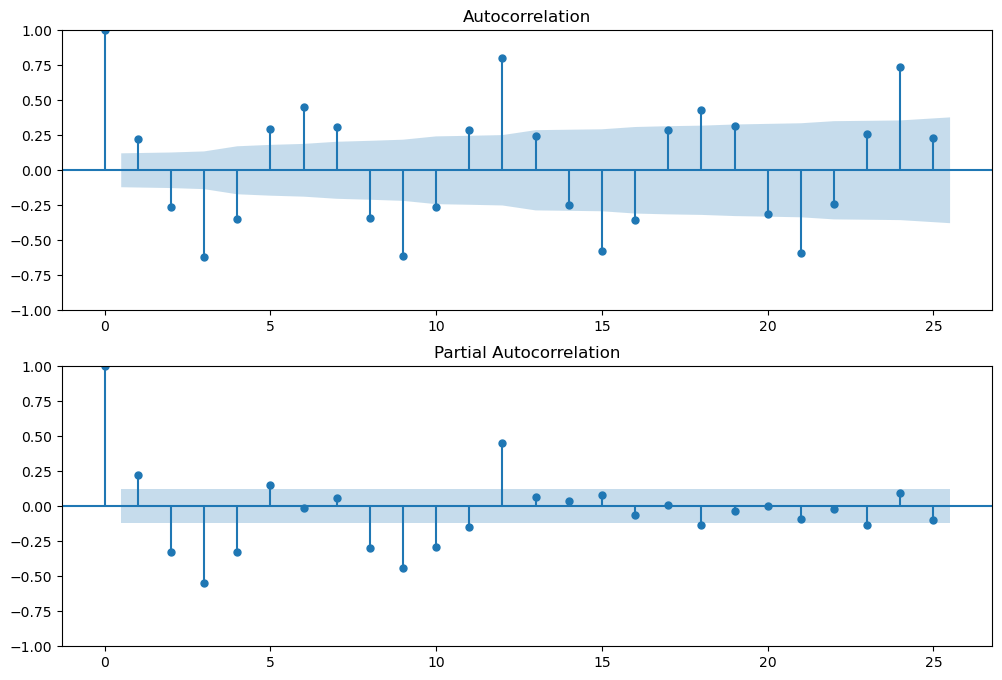

In [83]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(series_diff, ax=ax1)
plot_pacf(series_diff, ax=ax2)
plt.show()

<Axes: xlabel='Month'>

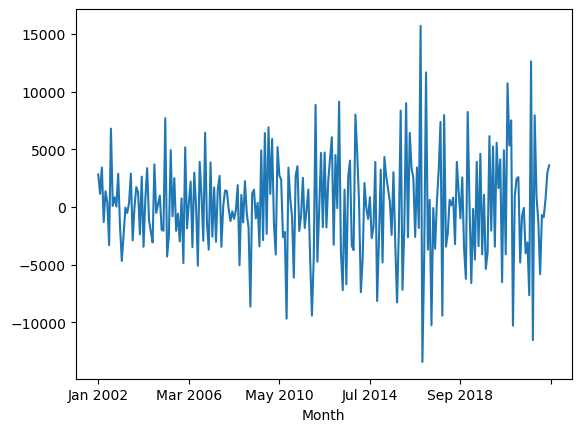

In [84]:
series_12_diff = series_diff.diff(12).dropna()
series_12_diff.plot()

In [85]:
sm.stats.acorr_ljungbox(series_12_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,24.383629,7.893664e-07
2,24.403220,5.022364e-06
3,24.537172,1.929297e-05
4,25.368197,4.242112e-05
5,25.608211,1.062819e-04
6,25.884130,2.339836e-04
7,26.722547,3.738495e-04
8,26.955962,7.194718e-04
9,26.995251,1.401300e-03
10,27.867386,1.895625e-03


In [86]:
result = adfuller(series_12_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.92063054930773
p-value: 2.511445772748799e-07


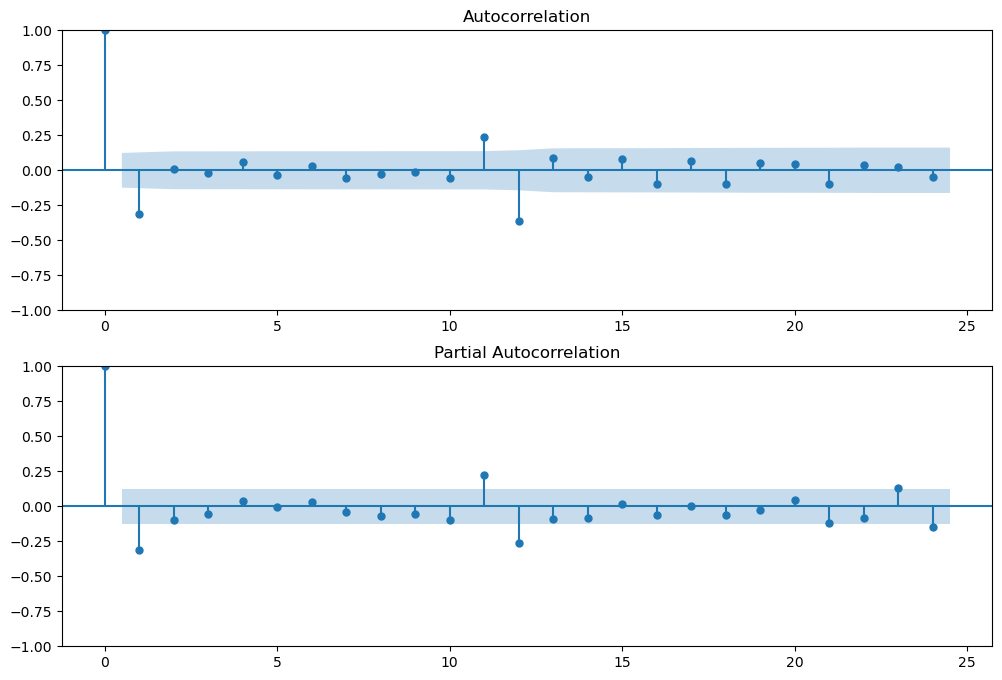

In [87]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(series_12_diff, ax=ax1)
plot_pacf(series_12_diff, ax=ax2)
plt.show()